In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
# Read the results.csv file
df = pd.read_csv('results.csv')

# Display the data
df.head()

,Total elapsed time,Number of nodes,Communication,Synchronization,Computation,Metric
0,66887628763,1,3905150633,21627860437,41354617693,0.617416
1,38200187790,2,4262915254,12104431187,21832841349,0.749666
2,28161003628,3,4001085021,8719090200,15440828407,0.823801
3,22558484624,4,3934621029,6890908459,11732955136,0.922660
4,19844638438,5,4134417616,5972185815,9738035007,1.037848


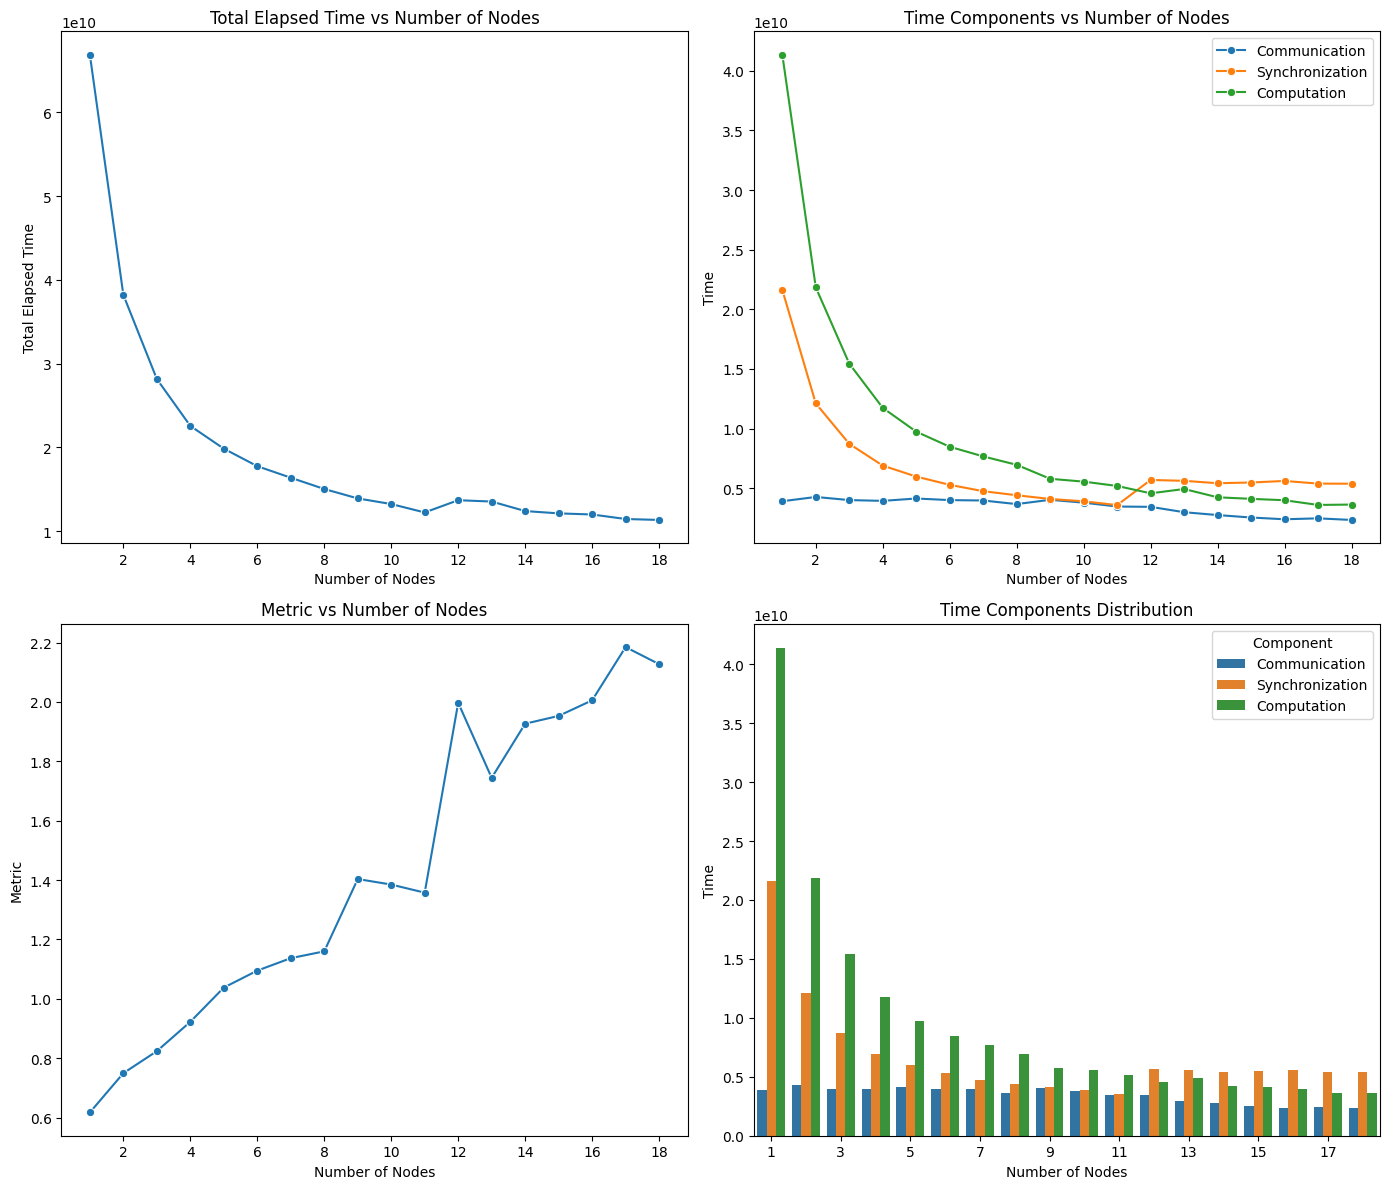

In [13]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot Total elapsed time vs Number of nodes
sns.lineplot(x='Number of nodes', y='Total elapsed time', marker='o', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Total Elapsed Time vs Number of Nodes')
axs[0, 0].set_xlabel('Number of Nodes')
axs[0, 0].set_ylabel('Total Elapsed Time')

# Plot Communication, Synchronization, and Computation times vs Number of nodes
sns.lineplot(x='Number of nodes', y='Communication', marker='o', data=df, ax=axs[0, 1], label='Communication')
sns.lineplot(x='Number of nodes', y='Synchronization', marker='o', data=df, ax=axs[0, 1], label='Synchronization')
sns.lineplot(x='Number of nodes', y='Computation', marker='o', data=df, ax=axs[0, 1], label='Computation')
axs[0, 1].set_title('Time Components vs Number of Nodes')
axs[0, 1].set_xlabel('Number of Nodes')
axs[0, 1].set_ylabel('Time')
axs[0, 1].legend()

# Plot Metric vs Number of nodes
sns.lineplot(x='Number of nodes', y='Metric', marker='o', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Metric vs Number of Nodes')
axs[1, 0].set_xlabel('Number of Nodes')
axs[1, 0].set_ylabel('Metric')

# Plot stacked bar chart for time components
df_melted = df.melt(id_vars='Number of nodes', value_vars=['Communication', 'Synchronization', 'Computation'],
          var_name='Component', value_name='Time')

sns.barplot(x='Number of nodes', y='Time', hue='Component', data=df_melted, ax=axs[1, 1])
axs[1, 1].set_title('Time Components Distribution')
axs[1, 1].set_xlabel('Number of Nodes')
axs[1, 1].set_ylabel('Time')

# Adjust layout
plt.tight_layout()

# Convert X label to integer
axs[0, 0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[0, 1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[1, 0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Show plots
plt.show()
